GitHub/PredictCode/examples/Case%20Study%20Chicago%20South%20Side/Knox%20Statistics.ipynb


In [1]:
import os, csv, lzma
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import descartes
from itertools import product
from collections import Counter

import sys
import inspect
import importlib

sys.path.insert(0, os.path.abspath(".."))

In [3]:
from common import *
import open_cp.knox

print(inspect.getfile(common))
print(inspect.getfile(open_cp.knox))

C:\Users\Dustin\Documents\GitHub\PredictCode\sandbox\common.py
C:\Users\Dustin\Documents\GitHub\PredictCode\open_cp\knox.py


In [4]:

datadir = os.path.join("..", "..", "Data")
south_side, points = load_data(datadir)

In [5]:
knox = open_cp.knox.Knox()
knox.set_time_bins([(i*7,i*7+7) for i in range(10)], unit="days")
knox.space_bins = list( (i*100,i*100+100) for i in range(20) )
knox.data = points
print(len(points.timestamps))

3395


In [7]:
result = knox.calculate(iterations=50)

testing 123
got points
got dists and times
got time_distances
got stats
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [8]:
def knox_ratio(statistic, distribution):
    """As in the paper, compute the ratio of the statistic to the median
    of the values in the distribution"""
    d = np.array(distribution)
    d.sort()
    return statistic / d[len(d)//2]

In [9]:
cdict = {'red':   [(0.0,  1.0, 1.0),
                   (1.0,  1.0, 1.0)],

         'green': [(0.0,  1.0, 1.0),
                   (1.0,  0.0, 0.0)],

         'blue':  [(0.0,  0.2, 0.2),
                   (1.0,  0.2, 0.2)]}
my_cmap = matplotlib.colors.LinearSegmentedColormap("mycmap", cdict)
mappable = plt.cm.ScalarMappable(cmap=my_cmap)

def all_ratios(result):
    for i, space_bin in enumerate(result.space_bins):
        for j, time_bin in enumerate(result.time_bins):
            yield knox_ratio(result.statistic(i,j), result.distribution(i,j))
            
mappable.set_array(list(all_ratios(result)))
mappable.autoscale()

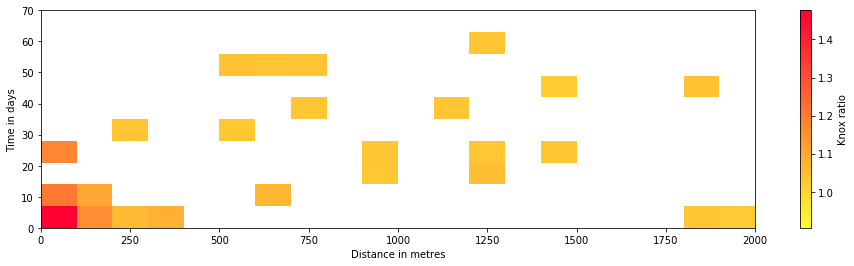

In [10]:
fig, ax = plt.subplots(figsize=(16,4))

xmin = min(x for x,y in result.space_bins)
xmax = max(y for x,y in result.space_bins)
ax.set(xlim=(xmin, xmax), xlabel="Distance in metres")

_day = np.timedelta64(1,"D")
ymin = min(t / _day for t,s in result.time_bins)
ymax = max(s / _day for t,s in result.time_bins)
ax.set(ylim=(ymin, ymax), ylabel="Time in days")

for i, space_bin in enumerate(result.space_bins):
    for j, time_bin in enumerate(result.time_bins):
        if result.pvalue(i,j) >= 0.05:
            continue
        ratio = knox_ratio(result.statistic(i,j), result.distribution(i,j))
        x, y = space_bin[0], time_bin[0] / _day
        width = space_bin[1] - space_bin[0]
        height = (time_bin[1] - time_bin[0]) / _day
        p = matplotlib.patches.Rectangle((x,y), width, height, fc=mappable.to_rgba(ratio))
        ax.add_patch(p)
        
cbar = fig.colorbar(mappable, orientation="vertical")
cbar.set_label("Knox ratio")

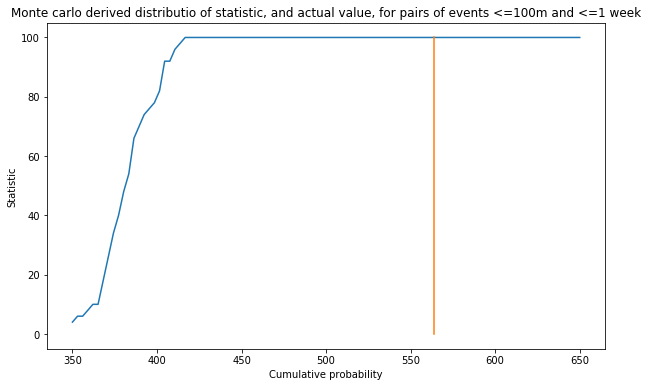

In [11]:
fig, ax = plt.subplots(figsize=(10,6))

d = np.array(result.distribution(0,0))
d.sort()

x = np.linspace(350, 650, 100)
y = [ np.sum(d <= xx) / len(d) * 100 for xx in x ]
ax.plot(x,y)

a = result.statistic(0,0)

ax.plot([a,a], [0, 100])
ax.set(xlabel="Cumulative probability", ylabel="Statistic")
ax.set_title("Monte carlo derived distributio of statistic, and actual value, for pairs of events <=100m and <=1 week")
None